## **SENTIMENT ANALYSIS USING LOGISTIC REGRESSION**

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [51]:
df = pd.read_csv('imdb.csv')  
df.sample(10)

,text,label
22775,But how can you stand to mange a baseball team...,1
6557,"My friends and I rented this for ""Bad Movie Ni...",0
15456,Where do I start. Lets list the good things ab...,0
4572,This movie is rated a classic on sentiment not...,0
29552,Why this film was only released in 4 states is...,1
40421,I am and was very entertained by the movie. It...,1
42515,"Pushing Daisies is just a lovely fairy tale, w...",1
6156,**WARNING: POSSIBLE SPOILER**<br /><br />If yo...,0
20662,I'll admit to being biased when I reviewed thi...,1
9261,This film attempts to cash in on the success o...,0


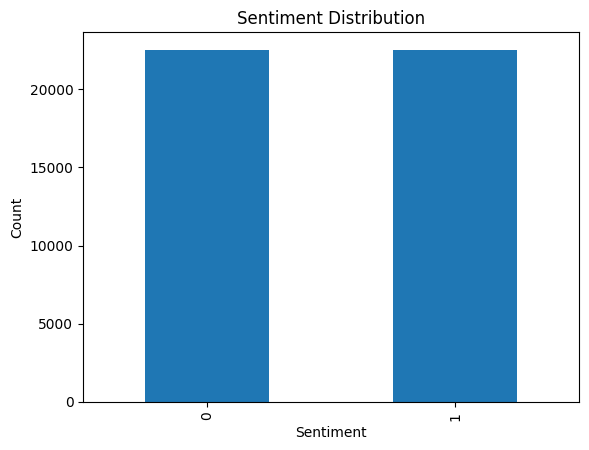

In [52]:
df['label'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [53]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [54]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = " ".join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    return text

In [55]:
print(df.columns)


Index(['text', 'label'], dtype='object')


In [56]:
df['cleaned_review'] = df['text'].astype(str).apply(clean_text)
df[['text', 'cleaned_review']].head()

,text,cleaned_review
0,I always wrote this series off as being a comp...,alway wrote seri complet stinkfest jim belushi...
1,1st watched 12/7/2002 - 3 out of 10(Dir-Steve ...,st watch dirstev purcel typic mari kate ashley...
2,This movie was so poorly written and directed ...,movi poorli written direct fell asleep minut m...
3,The most interesting thing about Miryang (Secr...,interest thing miryang secret sunshin actor je...
4,"when i first read about ""berlin am meer"" i did...",first read berlin meer didnt expect much thoug...


In [57]:
df['label'] = df['label'].map({'positive': 1, 'negative': 0})

In [58]:
df = df.dropna(subset=['label'])

In [59]:
df['label'] = df['label'].astype(int)

In [64]:
df['cleaned_review'] = df['cleaned_review'].astype(str)

In [65]:
df = df[df['cleaned_review'].str.strip() != '']


In [66]:
df = df.dropna(subset=['cleaned_review', 'label'])


In [68]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_review']).toarray()
y = df['label'].astype(int) 

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

ValueError: Input y contains NaN.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100 

In [ ]:
print(f"Accuracy: {accuracy:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
while True:
    user_input = input("Enter a review ('exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    cleaned = clean_text(user_input)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)[0]
    sentiment = "Positive" if pred == 1 else "Negative"
    print(f"Predicted Sentiment: {sentiment}\n")